In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def cv_show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
def cv2_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

(263, 263, 2)
(263, 263, 2)
(263, 263)


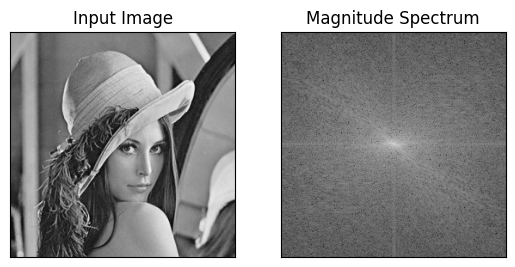

In [6]:
img = cv2.imread('01_Picture/13_Lena.jpg',0)
img_float = np.float32(img)
dft = cv2.dft(img_float, flags = cv2.DFT_COMPLEX_OUTPUT) #傅里叶变换
print(dft.shape)
dft_shift = np.fft.fftshift(dft) # 将低频值，频率为0的部分转换到中间的位置
print(dft_shift.shape)

#对两个通道进行转换才能得到图像形式表达，由于转换后的值为非常小的数值，因此还要转换到0-255之间
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
print(magnitude_spectrum.shape)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


263 263


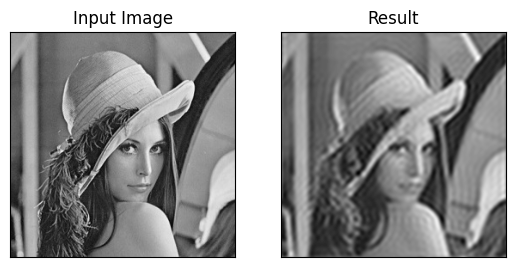

In [9]:
rows, cols = img.shape
print(rows, cols)
crow, ccol = int(rows/2), int(cols/2)

# 低通滤波
mask = np.zeros((rows,cols,2),np.uint8)
# 只保留中心点周围的区域，中心点为最低频的
mask[crow-30:crow+30,ccol-30:ccol+30] = 1

# IDFT （傅里叶逆变换）
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])
plt.show()


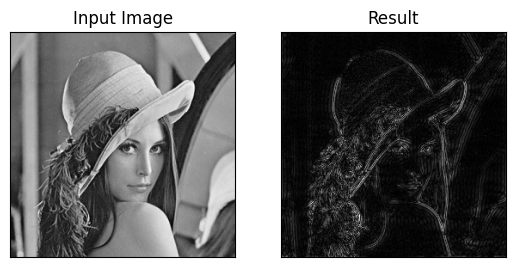

In [10]:
# 高通滤波
mask = np.ones((rows,cols,2),np.uint8)
# 中间区域置0，外面的区域置1
mask[crow-30:crow+30,ccol-30:ccol+30] = 0

# IDFT （傅里叶逆变换）
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])
plt.show()